# Model Selection

- Importar librerías
- Cargar Datos del círculo
- Implementar validación cruzada
    - reportar error 
- Seleccionar una buena topología de red
    - uso de pipeline

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/circulo.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['class'], test_size=0.33)

In [47]:
model=MLPClassifier( hidden_layer_sizes=(100,50))


In [48]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(1-scores),np.std(1-scores))

(0.40748737515430367, 0.10790852969411023)


Ahora normalizado

In [52]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/circulo.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['class'], test_size=0.33)

In [53]:
scalerX = StandardScaler()
scalerX=scalerX.fit(X_train)
X_train=scalerX.transform(X_train)


In [54]:
model=MLPClassifier( hidden_layer_sizes=(100,50)) # Esta mal porque escale antes
scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(1-scores),np.std(1-scores))


(0.01795533610144766, 0.01017608624610347)


In [58]:
def accuracy(X,y):
    errores=0
    for modelo,realidad in zip(model.predict(X),y):
        errores+=abs(modelo-realidad)
    return 100.0*errores/len(y)

In [59]:
model.fit(X_train,y_train)
X_test=scalerX.transform(X_test)
print 1-model.score(X_test,y_test),accuracy(X_test,y_test)

0.22424242424242424 22.4242424242


Crear un pipeline

In [61]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/circulo.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['class'], test_size=0.33)

In [62]:
scalerX = StandardScaler()
red=MLPClassifier( hidden_layer_sizes=(100,50))

In [64]:
model=Pipeline([('scaler', scalerX), ('RN', red)])
scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(1-scores),np.std(1-scores))
model.fit(X_train,y_train)
print 1-model.score(X_test,y_test)


(0.016418409207097362, 0.005525574676041909)
0.027272727272727226


Seleccionar topología

In [67]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/circulo.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['class'], test_size=0.5)


In [68]:
trainerr=[]
cverror=[]
params=[10,100,500]

for i in params:
    scalerX = StandardScaler()
    red=MLPClassifier( hidden_layer_sizes=(i,50))
    model=Pipeline([('scaler', scalerX), ('RN', red)])
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cverror.append(np.mean(1-scores))
    #Las siguientes lineas no son necesarias, son para fines ilustrativos
    model=model.fit(X_train,y_train)
    trainerr.append(np.mean(1-model.score(X_train,y_train)))
    

    

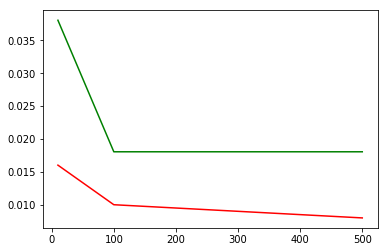

In [70]:
plt.plot(params,trainerr,c='r')
plt.plot(params,cverror,c='g')

In [73]:
min(zip(cverror,params),key=lambda x: x[0])

(0.018060606060606065, 100)

In [77]:
scalerX = StandardScaler()
red=MLPClassifier( hidden_layer_sizes=(100,50))
model=Pipeline([('scaler', scalerX), ('RN', red)])
model=model.fit(X_train,y_train)

In [81]:
1-model.score(X_test,y_test)

0.038000000000000034